# Analyzing Boston Airbnb data using the CRISP-DM Process
by J. Klinder

The CRISP-DM Process (Cross Industry Process for Data Mining) consists of the six following tasks:

1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy


In [1]:
## import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Business Understanding

- In which time in the year does Boston have the most bookings?
- What is the most extensive and cheapest area in Boston?
 - Does the mean price of the location influence the numer of bookings?
- Is there a general correlation between the number of rooms (e.g. bedrooms) and the price of an accommodation?

## 2. Data Understanding

In [2]:
## load csv files
# load calendar data into data frame
df_calendar = pd.read_csv('calendar.csv')
# load listing data into data frame
df_listings = pd.read_csv('listings.csv')
# load review data into data frame
df_reviews = pd.read_csv('reviews.csv')

In [3]:
## get an overview of the data frame df_calendar

In [4]:
df_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [5]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [6]:
df_calendar.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


In [7]:
# check which columns have more than 25% missing values
df_calendar_column_to_drop = df_calendar.columns[df_calendar.isnull().mean()>0.25]
df_calendar_column_to_drop

Index(['price'], dtype='object')

In [8]:
## get an overview of the data frame df_listings

In [9]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [10]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [11]:
df_listing_columns_url = ['listing_url', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url']
df_listing_columns_url

['listing_url',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url']

In [12]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [13]:
# check which columns have more than 25% missing values
df_listings_column_to_drop = df_listings.columns[df_listings.isnull().mean()>0.25]
df_listings_column_to_drop

Index(['space', 'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'host_about',
       'neighbourhood_group_cleansed', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'has_availability',
       'license', 'jurisdiction_names'],
      dtype='object')

In [14]:
# check categorical variables which will be used for analysis
### check neighbourhood
print('missing values:', df_listings.neighbourhood.isnull().sum())
df_listings.neighbourhood

missing values: 543


0       Roslindale
1       Roslindale
2       Roslindale
3              NaN
4       Roslindale
           ...    
3580    Somerville
3581           NaN
3582           NaN
3583    Somerville
3584    Somerville
Name: neighbourhood, Length: 3585, dtype: object

In [15]:
### check neighbourhood_cleansed
print('missing values:', df_listings.neighbourhood_cleansed.isnull().sum())
df_listings.neighbourhood_cleansed

missing values: 0


0        Roslindale
1        Roslindale
2        Roslindale
3        Roslindale
4        Roslindale
           ...     
3580    Charlestown
3581        Allston
3582    Charlestown
3583    Charlestown
3584    Charlestown
Name: neighbourhood_cleansed, Length: 3585, dtype: object

In [16]:
## get an overview of the data frame df_reviews

In [17]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [18]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [19]:
df_reviews.describe()

,listing_id,id,reviewer_id
count,6.827500e+04,6.827500e+04,6.827500e+04
mean,4.759910e+06,5.246516e+07,2.802389e+07
std,3.788990e+06,2.790991e+07,2.234097e+07
min,3.353000e+03,1.021000e+03,1.430000e+02
25%,1.458081e+06,3.010420e+07,9.001346e+06
50%,4.080000e+06,5.223121e+07,2.305179e+07
75%,7.377034e+06,7.663248e+07,4.213454e+07
max,1.484378e+07,9.999045e+07,9.335034e+07


In [20]:
# check which columns have more than 25% missing values
df_reviews_column_to_drop = df_reviews.columns[df_reviews.isnull().mean()>0.25]
df_reviews_column_to_drop

Index([], dtype='object')

## 3. Prepare Data

- drop columns which have irrelevant content like urls (saved in "df_listing_columns_url" for the data frame "df_listings")
- drop NaN rows for df_calendar & df_listings due to the importance of the column "price"
 - change price column in df_listings into float
- drop columns which have more than 25% missing values (column names saved in "df_listings_column_to_drop" for data frame "df_listings")
- impute columns which have less than 25% missing values using the mean values 
- change date columns into data format


In [21]:
# first create copies of data frames, before editing them
df_calendar_edit = df_calendar.copy()
df_listings_edit = df_listings.copy()
df_reviews_edit = df_reviews.copy()

In [22]:
## remove irrelant content (url columns) within data frame df_listings_edit
df_listings_edit = df_listings_edit.drop(columns=df_listing_columns_url)
# test data frame
#df_listings_edit.sample(5)

In [23]:
## drop NaN rows for "df_calendar_edit" & "df_listings_edit" due to the importance of the cloumn "price"
df_calendar_edit.dropna(subset=["price"], inplace=True)
df_listings_edit.dropna(subset=["price"], inplace=True)
# test drop NaN rows
#df_calendar_edit
#df_listings_edit

In [24]:
## change price column in df_listings_edit into float
# remove first character "$" of each price
df_listings_edit['price'] = df_listings_edit['price'].str[1:]
# remove character "," from each price & convert values into float
df_listings_edit['price'] = df_listings_edit['price'].str.replace(',', '').astype(float)
# test values of column "price"
#df_listings_edit.price

In [25]:
## drop columns which have more than 25% missing values (column names saved in "df_listings_column_to_drop")
df_listings_edit = df_listings_edit.drop(columns=df_listings_column_to_drop)
# test data frame
#df_listings_edit.sample(5)

In [26]:
# count number of nan for each column
df_calendar_edit.isna().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [27]:
# count number of nan for each column
df_listings_edit_columns_with_nan = df_listings_edit.columns[df_listings_edit.isna().sum()>0]
df_listings_edit_columns_with_nan

Index(['summary', 'host_location', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_neighbourhood', 'neighbourhood', 'city',
       'zipcode', 'market', 'property_type', 'bathrooms', 'bedrooms', 'beds',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [28]:
# count number of nan for each column
df_reviews_edit.isna().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         53
dtype: int64

- "df_calendar_edit" has no column with missing values
- "df_listings_edit" has just the columns "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month" with missing values which are useful to be imputed
- "df_reviews_edit" has just the object or text column "comments" with missing values which does not need to be imputed for further investigation

In [29]:
## impute columns "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month" of data frame 'df_listings_edit' which have less than 25% missing values using the mean values 
df_listings_edit_columns_with_nan = ["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month"]
for col in df_listings_edit_columns_with_nan:
    df_listings_edit[col].fillna(df_listings_edit[col].mean(), inplace = True)

# test filling
#df_listings_edit.columns[df_listings_edit.isna().sum()>0]

In [30]:
## change date columns into data format
df_calendar_edit['date'] = pd.to_datetime(df_calendar_edit['date'])
df_listings_edit['last_scraped'] = pd.to_datetime(df_listings_edit['last_scraped'])
df_reviews_edit['date'] = pd.to_datetime(df_reviews_edit['date'])

# test data frame
#df_calendar_edit.info()
#df_listings_edit.info()
#df_reviews_edit.info()

## 4. Data Modeling
For this project data modeling (e.g. linear regresison) is not really necessary for a first overview, because the data are prepared already pretty good for first insights. 

## 5. Evaluate the Results

- Correlation between the price and the number of beds, number of bedrooms, as well as number of bathrooms
- Number of bookings per month
- Number of reviews based on the review score
- Price based on the review score
- Average prices in different locations of Boston

### Correlation between the price and the number of beds, number of bedrooms, as well as number of bathrooms

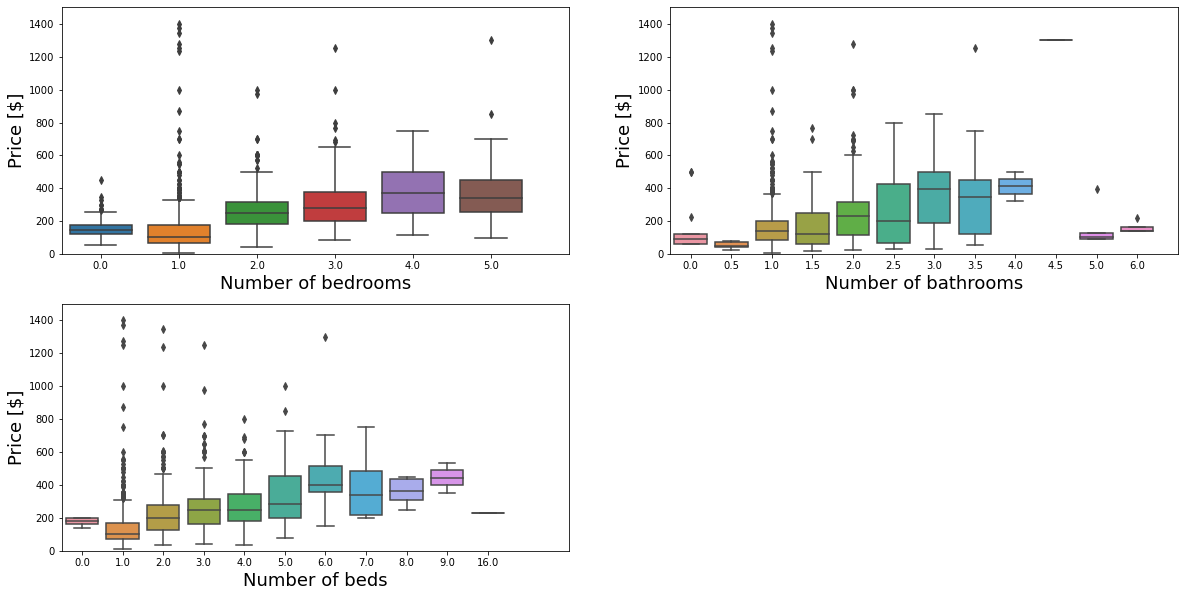

In [31]:
## Boxplots of number of beds and price, number of bedrooms and price, as well as number of bathrooms and price
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(x='bedrooms', y='price', data=df_listings_edit)
plt.xlabel(xlabel='Number of bedrooms', fontsize=18)
plt.ylabel(ylabel='Price [$]', fontsize=18);
plt.xlim(-0.5, 6);
plt.ylim(0, 1500);

plt.subplot(2,2,2)
sns.boxplot(x='bathrooms', y='price', data=df_listings_edit)
plt.xlabel(xlabel='Number of bathrooms', fontsize=18)
plt.ylabel(ylabel='Price [$]', fontsize=18);
plt.xlim(-0.5, 12);
plt.ylim(0, 1500);

plt.subplot(2,2,3)
sns.boxplot(x='beds', y='price', data=df_listings_edit)
plt.xlabel(xlabel='Number of beds', fontsize=18)
plt.ylabel(ylabel='Price [$]', fontsize=18);
plt.xlim(-0.5, 12);
plt.ylim(0, 1500);


Looking at the three above plots, it is visible that in general the higher the number beds, bedrooms or bathrooms is, the higher will be the median price (indicated by the horizontal line within the boxes). But nevertheless there are also some outliers showing that there are also a number of bookings with a small number of rooms or beds, but a high price. This could be related to more luxury apartments or "better" locations. 

### Number of bookings per month


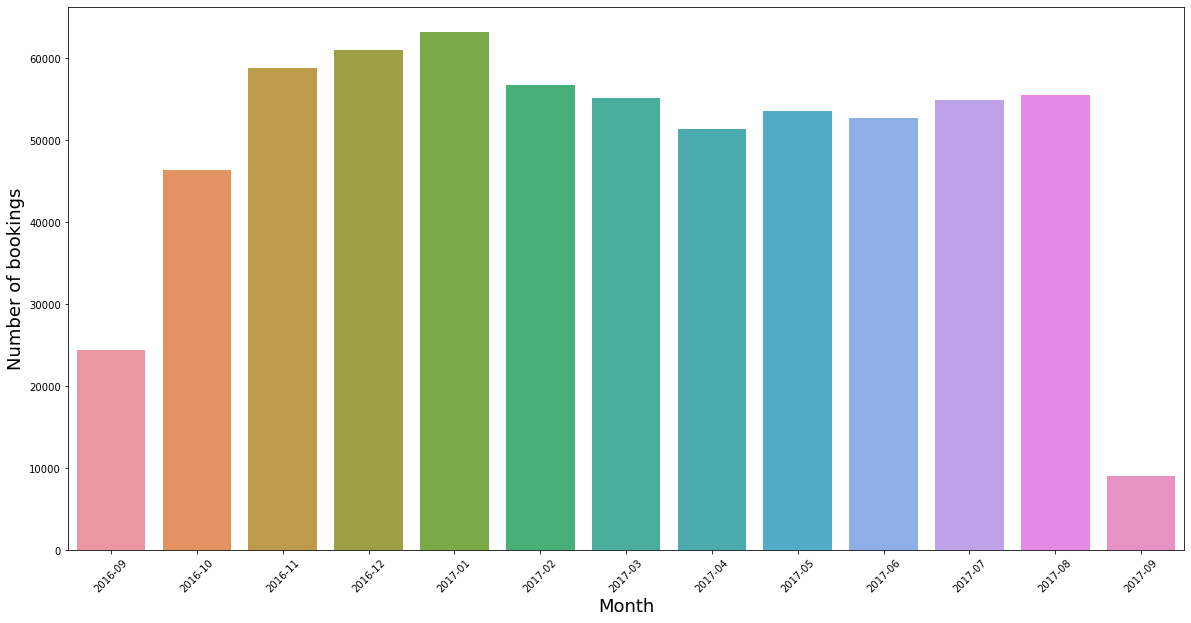

In [32]:
## Number of bookings per month
plt.figure(figsize=(20, 10))
df_calendar_edit['month'] = df_calendar_edit['date'].dt.to_period('M')
sns.countplot(data=df_calendar_edit, x='month', order=sorted(df_calendar_edit['month'].unique()))
plt.xlabel('Month',fontsize= 18)
plt.ylabel('Number of bookings',fontsize= 18);
plt.xticks(rotation=45);

In [33]:
df_calendar_edit.groupby(["month"]).price.count()

month
2016-09    24401
2016-10    46345
2016-11    58888
2016-12    60997
2017-01    63181
2017-02    56810
2017-03    55181
2017-04    51382
2017-05    53600
2017-06    52731
2017-07    54963
2017-08    55561
2017-09     8997
Freq: M, Name: price, dtype: int64

The dataset contains Airbnb bookings from September 2016 until September 2017. Due to the fact that the number of bookings in the two September months are significant lower than all the other month, I assume that the data set is not containing the full booking of this month. Besides the September months the number of bookings is pretty constant between around 45,000 and 63,000 bookings per month. Nevertheless, the two month between the new year (December and January) have a shlitly higher amount of bookings with values > 60,000. 

### Number of reviews based on the review score


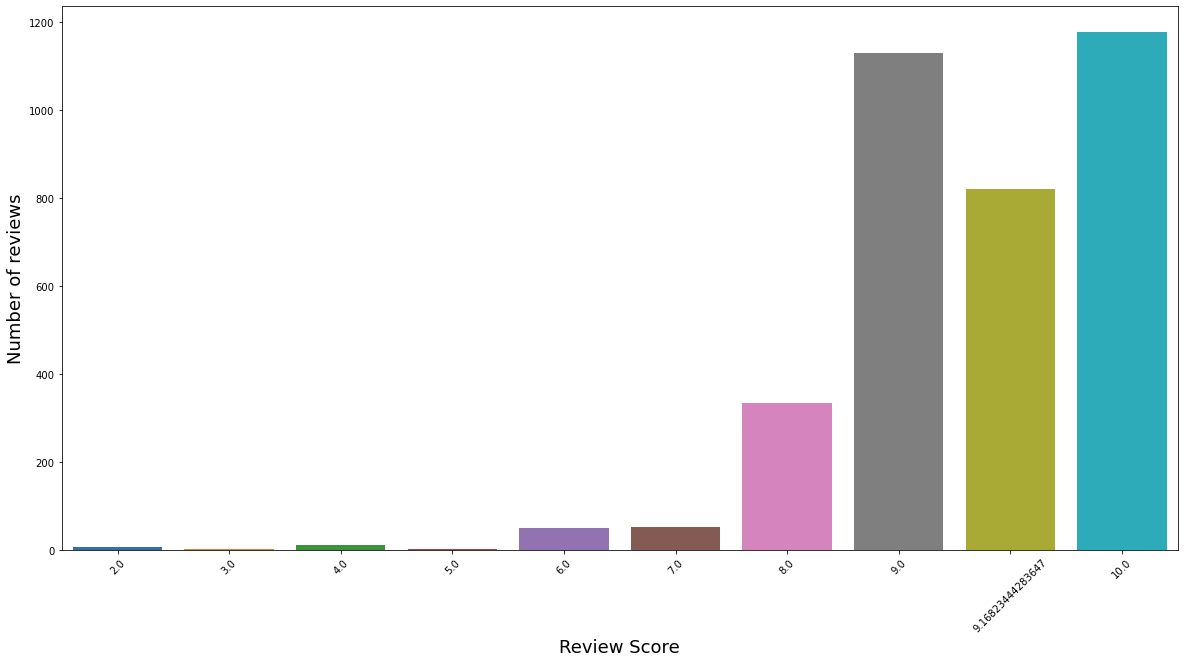

In [34]:
## Number of reviews based on the review score
plt.figure(figsize=(20, 10))
sns.countplot(data=df_calendar_edit, x=df_listings_edit['review_scores_value'])
plt.xlabel('Review Score',fontsize= 18)
plt.ylabel('Number of reviews',fontsize= 18)
plt.xticks(rotation=45);

### Price based on the review score

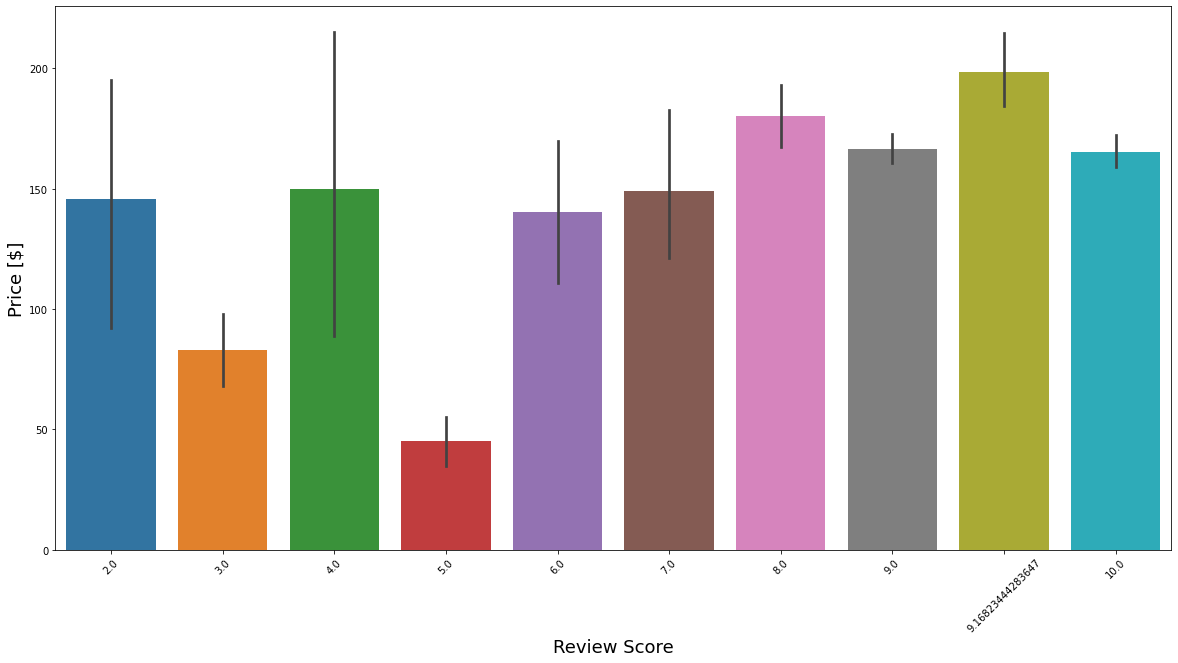

In [35]:
## Price in $ based on the review score
plt.figure(figsize=(20,10))
sns.barplot(x='review_scores_value', y='price', data=df_listings_edit)
plt.xlabel(xlabel='Review Score', fontsize=18)
plt.ylabel(ylabel= 'Price [$]', fontsize=18);
plt.xticks(rotation=45);

### Average prices in different locations of Boston

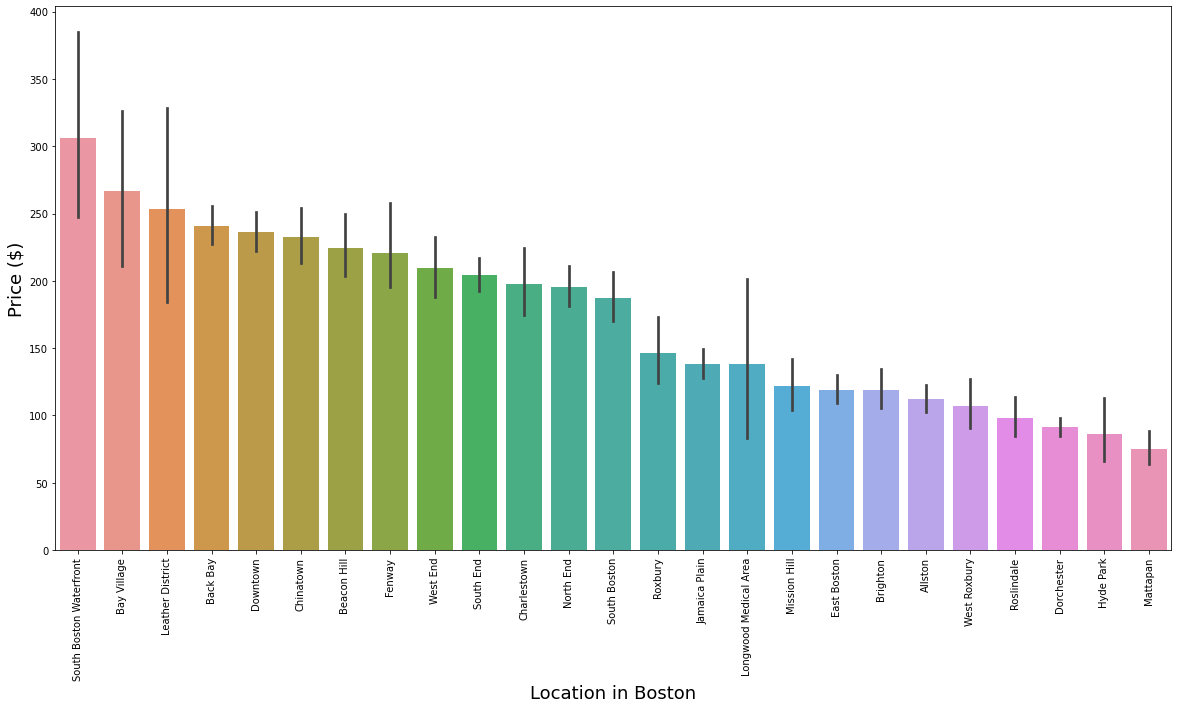

In [36]:
## Average prices in different locations of Boston
plt.subplots(figsize=(20,10))
sort = df_listings_edit.groupby(["neighbourhood_cleansed"])['price'].mean().sort_values(ascending=False)
sns.barplot(x='neighbourhood_cleansed', y='price', data=df_listings_edit, order=sort.index)
plt.xlabel('Location in Boston', fontsize=18)
plt.ylabel('Price ($)', fontsize=18)
plt.xticks(rotation=90);

South Boston Waterfront is the most expensive location in Boston with a mean price of above \\$300. This is followed by Bay Village and Leather District which have mean price around \\$250. The cheapest locations in Boston are Dorchester, Hyde Park and Mattapan with mean prices below \\$100. 

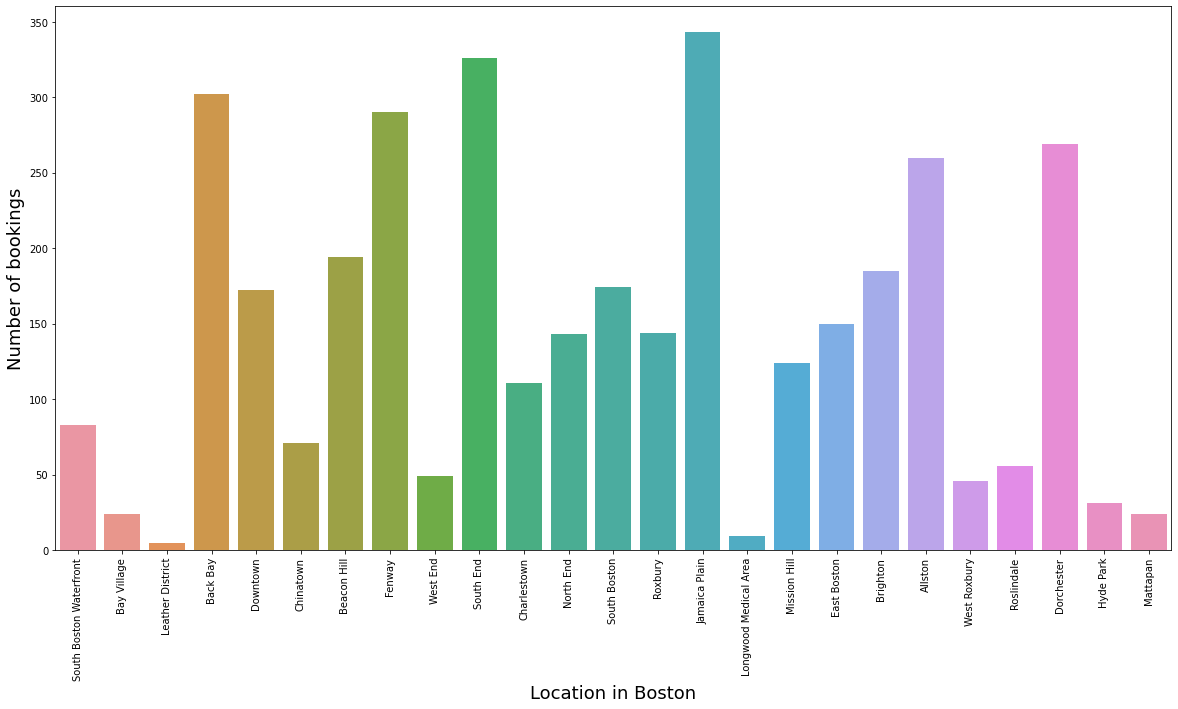

In [37]:
## Average number of bookings in different locations of Boston
plt.subplots(figsize=(20,10))
sort = df_listings_edit.groupby(["neighbourhood_cleansed"])['price'].mean().sort_values(ascending=False)
sns.countplot(x='neighbourhood_cleansed', data=df_listings_edit, order=sort.index)
plt.xlabel('Location in Boston', fontsize=18)
plt.ylabel('Number of bookings', fontsize=18)
plt.xticks(rotation=90);

I keeped the ordering of the x-axis as shown in the plot before to compare if the number of bookings is correlated with the price. The plot above shows that the most bookings took place in locations with a mean price between the highest and the lowest price. So it does not look like that there is a big correlation between the number of bookings and high-price or low-price locations.

In future projects one could also check additional information like the distance to the sightseeing locations or the city center etc. to get more insights into the reason why somebody is booking a room. 

## 6. Deployment
The deployment will be done within a blog post at medium. 